In [ ]:
from google.colab import files

from IPython.display import Image

In [ ]:
#install the dependencies
!pip install kaggle

In [ ]:
  files.upload()

In [ ]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c diabetic-retinopathy-detection


New Section

In [ ]:
from zipfile import ZipFile
file_name = "train_images.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

In [ ]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

In [ ]:
from os.path import join

retina_df = pd.read_csv('train.csv')
retina_df.head(5)

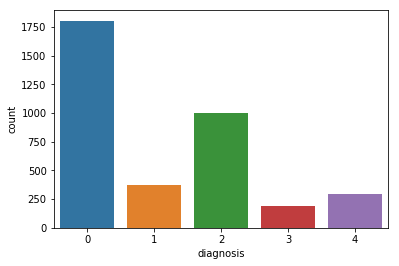

In [ ]:
import seaborn as sns

sns.countplot(retina_df.diagnosis)

In [ ]:
retina_df['id_code']=retina_df['id_code'].apply(lambda x: x+'.png')

In [ ]:
one = retina_df.loc[retina_df['diagnosis']==1]

In [ ]:
two = retina_df.loc[retina_df['diagnosis']==2]

In [ ]:
three = retina_df.loc[retina_df['diagnosis']==3]

In [ ]:
four = retina_df.loc[retina_df['diagnosis']==4]

In [ ]:
four = pd.concat([four]*5, ignore_index=True)

In [ ]:
three = pd.concat([three]*8, ignore_index=True)

In [ ]:
two = pd.concat([two]*1, ignore_index=True)

In [ ]:
one = pd.concat([one]*4, ignore_index=True)

In [ ]:
x = pd.concat([retina_df,four,three,two,one], ignore_index=True)

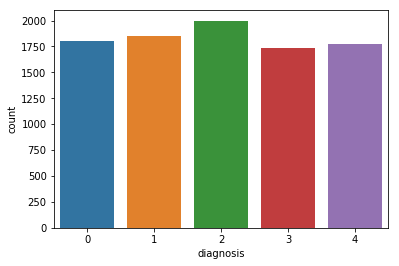

In [ ]:

sns.countplot(x.diagnosis)

In [ ]:
y=x.diagnosis

In [ ]:
y

In [ ]:
img=x['id_code']

In [ ]:
list(img)

In [ ]:
from os.path import join

image_dir = ''
img_paths = [join(image_dir, filename) for filename in img]

In [ ]:
import cv2

img_paths[0]

'000c1434d8d7.png'

In [ ]:
'''def read_and_prep_images(img_paths):
  img_array = np.array([cv2.cvtColor((cv2.resize((cv2.imread(img)),(480,480))),cv2.COLOR_BGR2GRAY) for img in img_paths])
  return img_array
'''
def read_and_prep_images(img_paths):
  img_array=np.array([cv2.addWeighted ((cv2.cvtColor((cv2.resize((cv2.imread(img)),(480,480))),cv2.COLOR_BGR2GRAY)),4, cv2.GaussianBlur((cv2.cvtColor((cv2.resize((cv2.imread(img)),(480,480))),cv2.COLOR_BGR2GRAY)), (0,0),480/10) ,-4 ,128) for img in img_paths])
  return img_array



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(img_paths,y,test_size=0.20)

In [ ]:
x_train = read_and_prep_images(x_train)


In [ ]:
x_test = read_and_prep_images(x_test)


In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
y_train.shape

(7328,)

In [ ]:
x_train.shape

(7328, 480, 480)

In [ ]:
x_test.shape

(1832, 480, 480)

In [ ]:
x_train=np.reshape(x_train, (7328,480,480,1))
x_train.shape

(7328, 480, 480, 1)

In [ ]:
x_test=np.reshape(x_test, (1832,480,480,1))
x_test.shape

(1832, 480, 480, 1)




'''
model = Sequential()
model.add(Flatten(input_shape=[480,480]))
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(5, activation="softmax"))
'''

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, MaxPooling2D, Conv2D, Dropout


model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(480, 480, 1)),
    MaxPooling2D(4, 4),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(4,4),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(4,4),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(4,4),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train,epochs=15,batch_size=80)

Epoch 1/15
7328/7328 [==============================] - 51s 7ms/step - loss: 1.3200 - acc: 0.4210
Epoch 2/15
7328/7328 [==============================] - 49s 7ms/step - loss: 1.1504 - acc: 0.5176
Epoch 3/15
7328/7328 [==============================] - 49s 7ms/step - loss: 1.0620 - acc: 0.5590
Epoch 4/15
7328/7328 [==============================] - 49s 7ms/step - loss: 0.9769 - acc: 0.5970
Epoch 5/15
7328/7328 [==============================] - 49s 7ms/step - loss: 0.8903 - acc: 0.6382
Epoch 6/15
7328/7328 [==============================] - 49s 7ms/step - loss: 0.7658 - acc: 0.6953
Epoch 7/15
7328/7328 [==============================] - 49s 7ms/step - loss: 0.6410 - acc: 0.7535
Epoch 8/15
7328/7328 [==============================] - 49s 7ms/step - loss: 0.5232 - acc: 0.8020
Epoch 9/15
7328/7328 [==============================] - 49s 7ms/step - loss: 0.4561 - acc: 0.8255
Epoch 10/15
7328/7328 [==============================] - 49s 7ms/step - loss: 0.3967 - acc: 0.8538
Epoch 11/15
7328/73

In [ ]:
predict = model.predict(x_test)

In [ ]:
model.evaluate(x_test, y_test)

1832/1832 [==============================] - 7s 4ms/step


[0.16233884019362355, 0.9514192139737991]

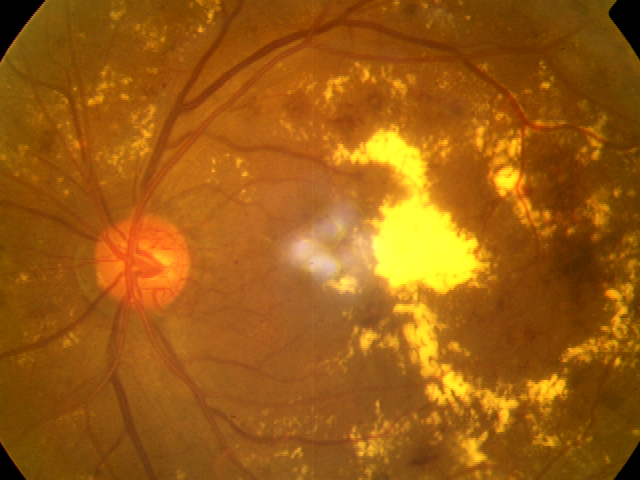

In [ ]:
from google.colab.patches import cv2_imshow
show = cv2.imread('d2.png')
cv2_imshow(show)

In [ ]:
testing = [join(image_dir, 'd2.png')]

In [ ]:
testing = read_and_prep_images(testing)

In [ ]:
testing = np.reshape(testing, (1,480,480,1))

In [ ]:
model.predict(testing)

array([[0., 0., 0., 1., 0.]], dtype=float32)